## Линейная регрессия.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### 1. Теория

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

1) Мы хотим минимизировать $f(\theta) = \sum_{i = 1}^n(Y_i - \theta x_i)^2 = \sum_{i = 1}^n Y_i^2 + \sum_{i = 1}^n \theta^2 x_i^2 - 2 \sum_{i = 1}^n \theta x_i Y_i$ - выпуклую вниз функцию. Необходимое и достаточное условие:

$$f'_{\theta}(\widehat \theta) = 0 = 2 \widehat \theta \sum_{i = 1}^n x_i^2 - 2 \sum_{i = 1}^n x_i Y_i \Rightarrow \widehat \theta = \frac{\sum_{i = 1}^n x_i Y_i}{\sum_{i = 1}^n x_i^2}$$

2) В методе градиентного спуска надо идти пропорционально градиенту, то есть $f'_{\theta}$, откуда для GD получаем следующую формулу для итерации оценки $\theta$ с шагом обучения $\eta$:

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{n} (\theta_{old} \sum_{i = 1}^n x_i^2 - \sum_{i = 1}^n x_i Y_i)  $$

В свою очередь в методе SGD с батчем размера $k$ случайно выбираются индексы $I = (i_1, i_2, \ldots i_k)$, причем $i_j \sim U(1, 2, \ldots n)$ - равномерно распределены (шаг обучения $\eta$):

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{k} (\theta_{old} \sum_{i \in I} x_i^2 - \sum_{i \in I} x_i Y_i)  $$

($I$ на каждой итерации выбирается отдельно)

---
### 2. Задача

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

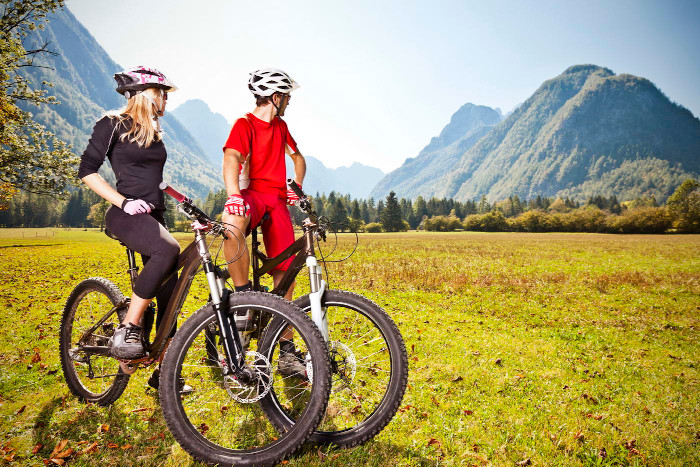

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv('day.csv', parse_dates=['dteday'], index_col=0)
data = data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
train, test = train_test_split(data, test_size=1/5)
train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
17,1,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,1000
614,3,9,0,3,1,1,0.736667,0.708983,0.741250,0.187808,7112
313,4,11,0,3,1,1,0.400000,0.409079,0.758333,0.062196,4109
701,4,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,5191
576,3,7,0,0,0,1,0.721667,0.667933,0.623750,0.170396,6597


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

In [5]:
categorial_features = ['season', 'mnth', 'holiday', 
                       'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

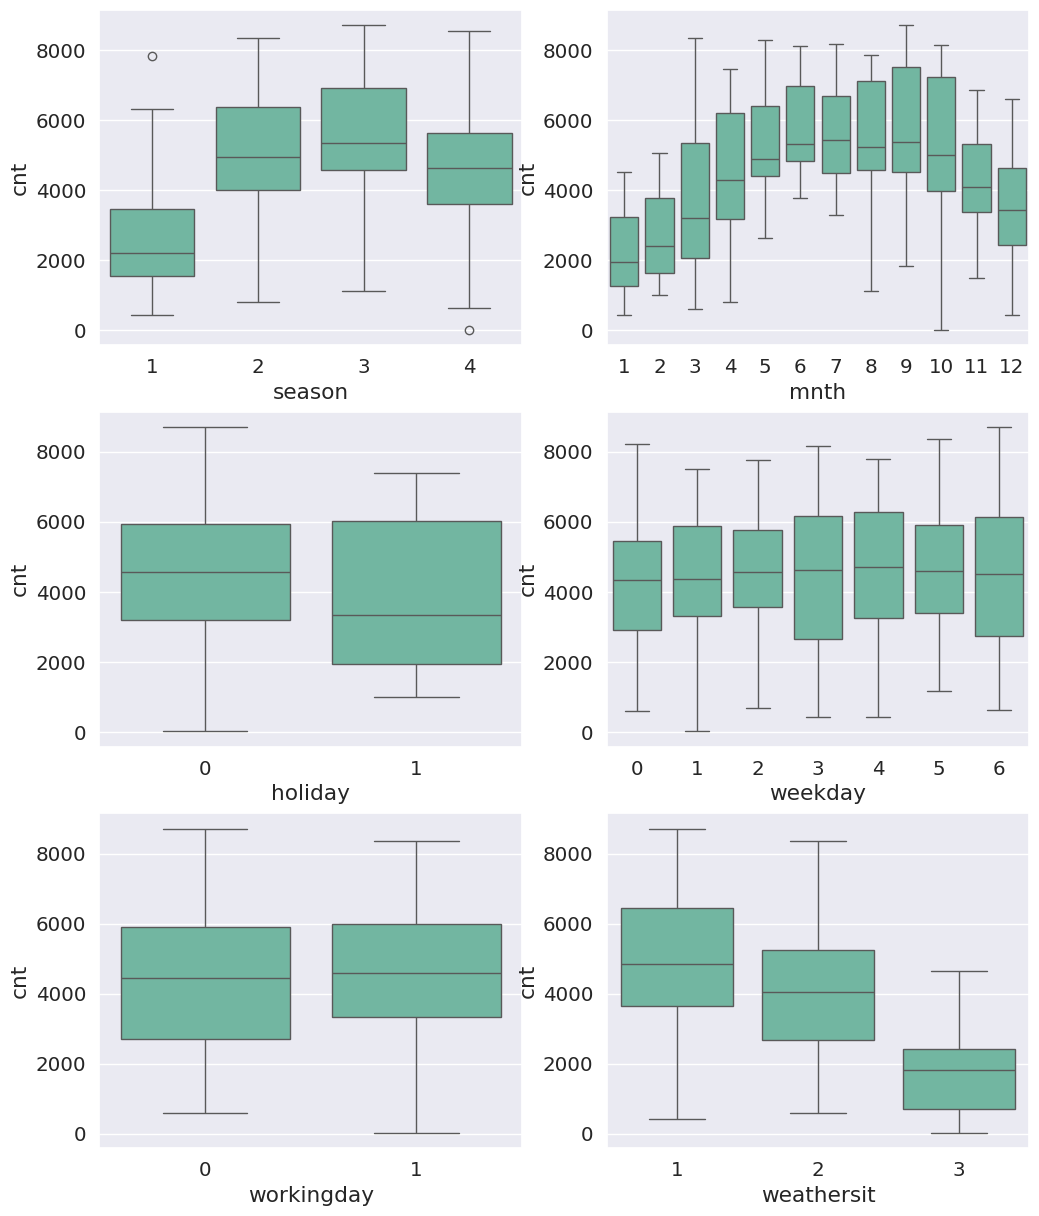

In [6]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 20))

    for i, column in enumerate(categorial_features):
        plt.subplot(4, 2, i + 1)
        sns.boxplot(
            data=data,
            x=column,
            y='cnt'
        )

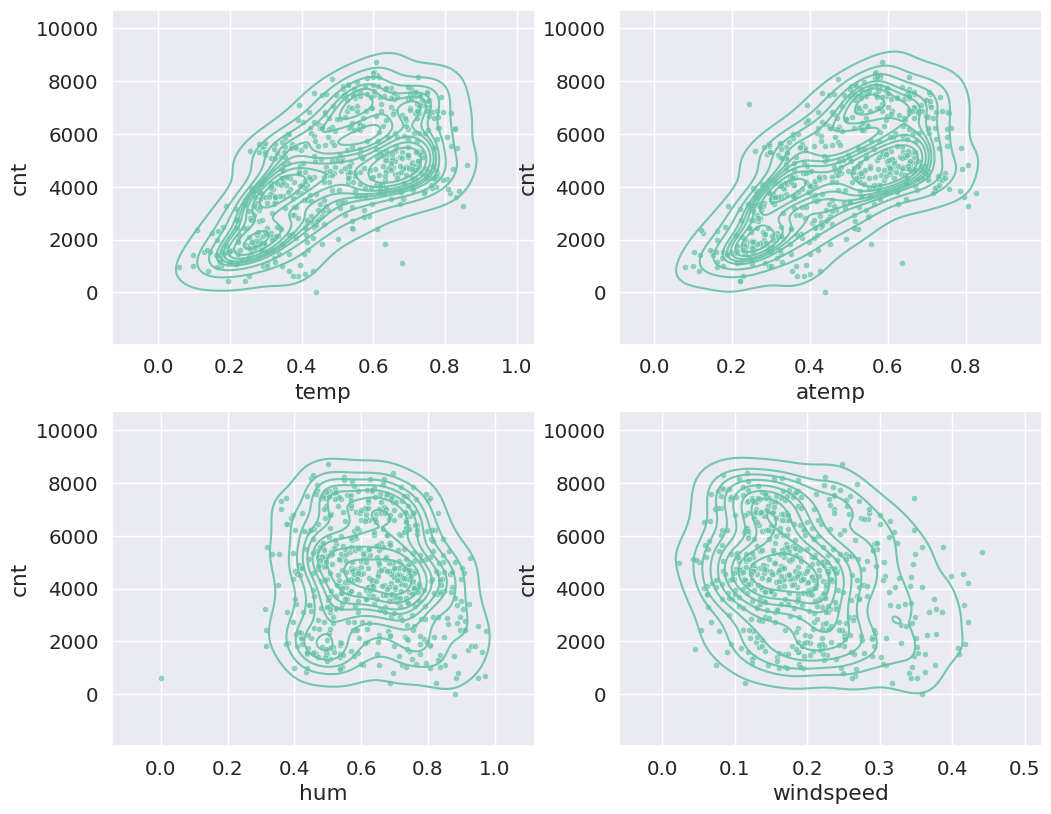

In [7]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 20))

    for i, column in enumerate(real_features):
        plt.subplot(4, 2, i + 1)
        sns.scatterplot(
            data=train, x=column, y="cnt", s=20, alpha=0.7
        )
        sns.kdeplot(data=train, x=column, y="cnt", alpha=0.9)

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

1) Чем более теплая погода, тем больше арендованных велосипедов

2) Как следствие из первого пункта в теплые месяцы и времена года высокий спрос

3) Аналогично в случае неблагоприятной спрос уменьшается значительно

4) В случае ветренной или влажной погоды спрос уменьшается, но несильно

5) Дни недели и праздники не так сильно влияют на спрос, как может сначала показаться

6) Есть небольшие выбросы (несколько точек)  с очень большой скоростью ветра или очень низкой влажностью, или слишком большим и маленьким количеством велопрокатов, их можно выкинуть. Сильных выбросов нет.

7) Особо пользы нелинейные метрики не дадут, потому что данные в целом расположены в одном кластере, плотнее к центру (в различных осях)


#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Выкинем выбросы

**б).** Разделим признаки на категориальные и вещественные

**в).** Закодируем категориальные признаки

Реализуйте данную процедуру.

Выкинем выбросы сразу отовсюду:

In [8]:
data = data[~((data['windspeed'] > 0.45) | (data['hum'] < 0.25) | 
                ((data['season'] == 4) & (data['cnt'] <= 100)) | 
                 ((data['season'] == 1) & (data['cnt'] >= 7000)) )]

Кодируем с выкидыванием первого столбца для линейной регрессии:

In [9]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
train_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

Соединим вместе вещественные признаки и закодированные категориальные

In [10]:
X_train = np.hstack([train[real_features], train_cat])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

Предварительно изменим точность вывода:

In [11]:
np.set_printoptions(precision=3, suppress=True)

In [12]:
model = LinearRegression(fit_intercept=True) 
model.fit(X_train, train[target_feature])

LinearRegression()

Коэффициенты и свободный коэффициент соответственно:

In [13]:
print(model.coef_, model.intercept_)

[ 5885.996   263.566 -3299.728 -3738.918  1180.216   939.645  1614.556
    71.548   356.727  -177.032    21.709  -492.504  -985.536  -397.589
   420.349   409.569  -142.4     -92.422  -250.074  -147.293    34.595
   -49.653   146.426    31.885   344.954   266.035  -213.066 -2126.584] 3330.398002913646


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Выкинем выбросы и сделаем предсказание

In [14]:
test = test[~((test['windspeed'] > 0.45)| (test['hum'] < 0.25))]

test_cat = encoder.transform(test[categorial_features])

X_test = np.hstack([test[real_features], test_cat])
test_preds = model.predict(X_test)

**RMSE:**

In [15]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1344.414017852043

**MAE:**

In [16]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1164.7508341875134

**MAPE:**

In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()


mean_absolute_percentage_error(test[target_feature], test_preds)

35.87455780143314

In [18]:
def RMSE_MAE_MAPE(test_target, test_preds):
    '''
        Подсчёт точности модели.
        
        Аргументы:
        test_target -- таргет в виде numpy-вектора размера (n,).
        test_preds -- предсказание в виде numpy-вектора размера (n,).
    '''
    
    RMSE = metrics.mean_squared_error(test_target, test_preds) ** 0.5
    MAE = metrics.mean_absolute_error(test_target, test_preds)
    MAPE = mean_absolute_percentage_error(test_target, test_preds)
    return RMSE, MAE, MAPE

RMSE_MAE_MAPE(test[target_feature], test_preds)

(1344.414017852043, 1164.7508341875134, 35.87455780143314)

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

По формуле МНК найдем коэффициенты:

$$ \theta = (X^T X)^{-1} X^T y$$

Предварительно добавим столбец из единиц для свободного члена. Напечатаем коэффициенты и в конце свободный член

In [19]:
m, n = X_train.shape
X =  np.hstack((X_train, np.ones((m, 1))))

MNK_coeff = np.linalg.inv(X.T @ X) @ X.T @ train['cnt']
MNK_coeff

array([ 3058242.856, -3066497.409,    21323.359,     8921.22 ,
           7920.34 ,   -16022.096,    14138.732,    -2902.531,
         -30022.188,   -53181.902,   -92786.871,  -134049.56 ,
        -140437.306,  -144651.135,  -127258.635,   -63985.165,
         -18270.851,    -4250.047,    23788.061,   -28604.213,
         -22884.908,   -13370.784,     1504.449,   -22739.088,
            344.954,       -4.999,     -213.066,    -2126.584,
           3330.398])

Как видим, коэффициенты сильно отличаются. Однако, например, свободные члены похожие. Посчитаем еще ошибки:

In [20]:
m, n = X_test.shape
test_preds =  np.hstack((X_test, np.ones((m, 1)))) @ MNK_coeff.reshape(-1, 1)
RMSE_MAE_MAPE(test[target_feature], test_preds[:, 0])

(44932.18578403585, 33682.34620787344, 1059.8772784143825)

Проблема заключается в том, что у нас присутствуют линейные зависимости между признаки, откуда вычисление обратной матрицы происходит с большой погрешностью.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Выкинем признаки, которые зависимы между собой, и исправим тестовые данные:

In [21]:
fixed_categorial_features = ['weekday', 'weathersit']
fixed_real_features = ['temp', 'hum', 'windspeed']  

fixed_train_cat = encoder.fit_transform(train[fixed_categorial_features])
X_train_fixed = np.hstack([train[fixed_real_features], fixed_train_cat])

Считаем коэффициенты (не забываем, что в конце столбец для свободного члена)

In [22]:
m, n = X_train_fixed.shape
X =  np.hstack((X_train_fixed, np.ones((m, 1))))
MNK_coeff = np.linalg.inv(X.T @ X) @ X.T @ train['cnt']
MNK_coeff

array([ 6123.173, -1722.241, -4318.502,    86.95 ,   323.953,   189.732,
         434.868,   336.434,   325.667,  -324.574, -1937.411,  3311.13 ])

И точность:

In [23]:
fixed_test_cat = encoder.transform(test[fixed_categorial_features])

fixed_X_test = np.hstack([test[fixed_real_features], fixed_test_cat])

m, n = fixed_X_test.shape
test_preds =  np.hstack((fixed_X_test, np.ones((m, 1)))) @ MNK_coeff.reshape(-1, 1)
RMSE_MAE_MAPE(test[target_feature], test_preds[:, 0])

(1397.7988162928648, 1156.284973255935, 37.08210115311796)

Сделайте выводы.

**Выводы:**
Точность точного решения МНК сильно выросла после удаления зависимых между собой признаков. При этом библиотечная линейная модель работает лучше из за своих внутренних оптимизаций. Это и логично, мы выкидываем часть признаков, значит наша предсказательная возможность слабее. Из коэффициентов например свободный член.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### Теория Ridge-регрессии

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

$$F(\theta) = (Y - X \theta)^T(Y - X \theta) + \lambda \theta^T \theta = Y^T Y - \theta^T X^T Y - Y^T X \theta + \theta^T X^T X \theta + \lambda \theta^T \theta$$

Заметим, что часть произведений в "удвоенной части" есть числа, а так же в силу линейности:
$$F(\theta) = Y Y^T + (-2 Y^T X) \theta  + \theta^T(\lambda I + X^T X) \theta \Rightarrow$$
$$\nabla F (\widehat \theta) = -2 X^T Y + (2 \lambda  I + 2X^T X) \theta = 0 \Rightarrow \widehat\theta = (\lambda I + X^T X)^{-1} X^T Y$$

Это **помогает** от проблем обратимости, потому что теперь мы не обращаем матрицу $X^T X$, которая может быть близка к вырожденной, а добавляем к ней слагаемое $\lambda I$

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

В методе градиентного спуска надо идти пропорционально градиенту,  откуда получаем следующую формулу для итерации оценки $\theta$ с шагом обучения $\eta$:

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{n} (- X^T Y + (\lambda  I + X^T X) \theta_{old}) = \theta_{old} - \eta \cdot \frac{1}{n} (- X^T Y + X^T X) \theta_{old}) - \frac{\eta}{n} \lambda \theta_{old}$$

В свою очередь в методе SGD с батчем размера $k$ случайно выбираются индексы $J = (i_1, i_2, \ldots i_k)$, причем $i_j \sim U(1, 2, \ldots n)$ - равномерно распределены (шаг обучения $\eta$):

$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{k} (- X_J^T Y_J + X_J^T X_J) \theta_{old}) - \frac{\eta}{n} \lambda \theta_{old}$$

(где $U_J$ - матрица, составленная из тех столбцов матрицы $U$, индексы которых в $J$; $J$ на каждой итерации выбирается отдельно)

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Так как мы выбираем $\lambda$ едино для всех признаков, а их численные значения значения могут существенно отличатся (например cnt порядка 10^3 и бинарные категории 0-1), то нужно их сделать одного порядка, чтобы уравнять их веса.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

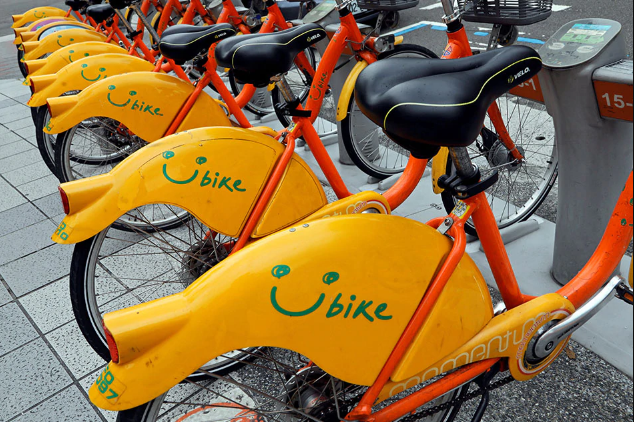

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [24]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        
        # Посчитайте оценки коэффициентов и, возможно, 
        # еще что-то, что пригодится в predict.
        
        n, d = X.shape
        
        X_new =  np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        d = d + 1 if self.fit_intercept else d

        self.coeff =  np.linalg.inv(X_new.T @ X_new + self.lambd * np.eye(d)) @ X_new.T @ Y

        self.grade = RMSE_MAE_MAPE(Y, self.predict(X))
        
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        
        # Посчитайте предсказания
        n, d = X.shape
        X_new =  np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        predictions = X_new @ self.coeff
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [25]:
#data = data[~((data['windspeed'] > 0.4)| (data['hum'] < 0.3))]
train, test = train_test_split(data, test_size=1/5)
train, valid = train_test_split(train, test_size=1/4)
train.size, valid.size, test.size

(4785, 1606, 1606)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

Категоризируем данные а затем стандартизируем их

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

train_cat = encoder.fit_transform(train[categorial_features])
valid_cat = encoder.transform(valid[categorial_features])
test_cat = encoder.transform(test[categorial_features])

scaler = MinMaxScaler()

train_cat = scaler.fit_transform(train_cat)
valid_cat = scaler.transform(valid_cat)
test_cat = scaler.transform(test_cat)

X_train = np.hstack([train[real_features], train_cat])
X_valid = np.hstack([valid[real_features], valid_cat])
X_test = np.hstack([test[real_features], test_cat])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [28]:
models_big = []
rmse_mae_mape = []

lambda_big_values = np.logspace(-20, 20)

for i, lambda_ in enumerate(lambda_big_values):
    models_big.append(RidgeRegression(lambd = lambda_, fit_intercept=True)) 
    models_big[i].fit(X_train, train[target_feature])

    rmse_mae_mape.append(list(RMSE_MAE_MAPE(valid['cnt'], models_big[i].predict(X_valid))))

rmse_mae_mape = np.array(rmse_mae_mape)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

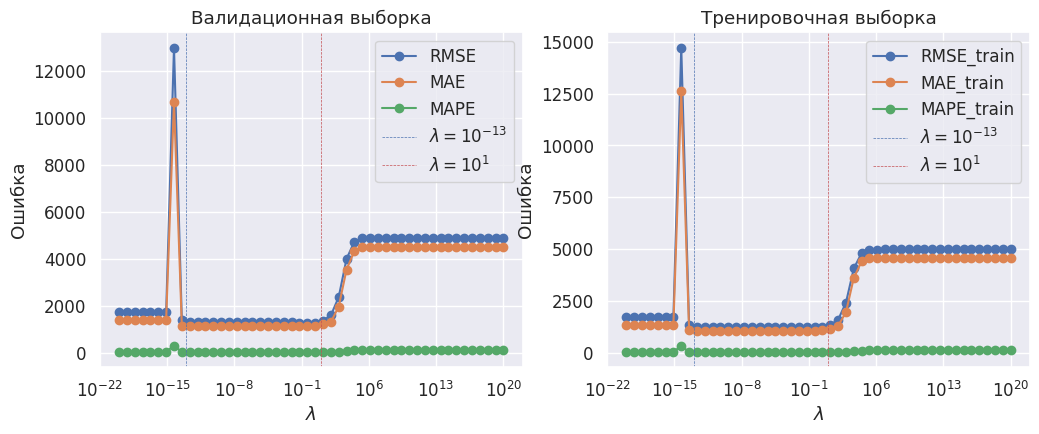

In [29]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    sns.set(font_scale=1.1)
    plt.figure(figsize=(12, 20))

    plt.subplot(4, 2, 1)
    plt.xscale('log')
    plt.plot(lambda_big_values, rmse_mae_mape[:, 0], label='RMSE', marker='o')
    plt.plot(lambda_big_values, rmse_mae_mape[:, 1], label='MAE', marker='o')
    plt.plot(lambda_big_values, rmse_mae_mape[:, 2], label='MAPE', marker='o')
    plt.axvline(x=10**(-13), color='b', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{-13}$')
    plt.axvline(x=10**1, color='r', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{1}$')
    plt.legend()

    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'Ошибка')
    plt.title(r'Валидационная выборка')
    plt.grid(True)

    plt.subplot(4, 2, 2)
    plt.xscale('log')
    plt.plot(lambda_big_values, [model.grade[0] for model in models_big], label='RMSE_train', marker='o')
    plt.plot(lambda_big_values, [model.grade[1] for model in models_big], label='MAE_train', marker='o')
    plt.plot(lambda_big_values, [model.grade[2] for model in models_big], label='MAPE_train', marker='o')
    plt.axvline(x=10**(-13), color='b', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{-13}$')
    plt.axvline(x=10**1, color='r', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{1}$')
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'Ошибка')
    plt.title(r'Тренировочная выборка')
    plt.legend()

Откуда видно, что лучше брать $\lambda$ в np.logspace(-13, 1), что там точность лучшая и не меняется, пересчитаем все там. Сравним их на тренировочной и валидационной частях:

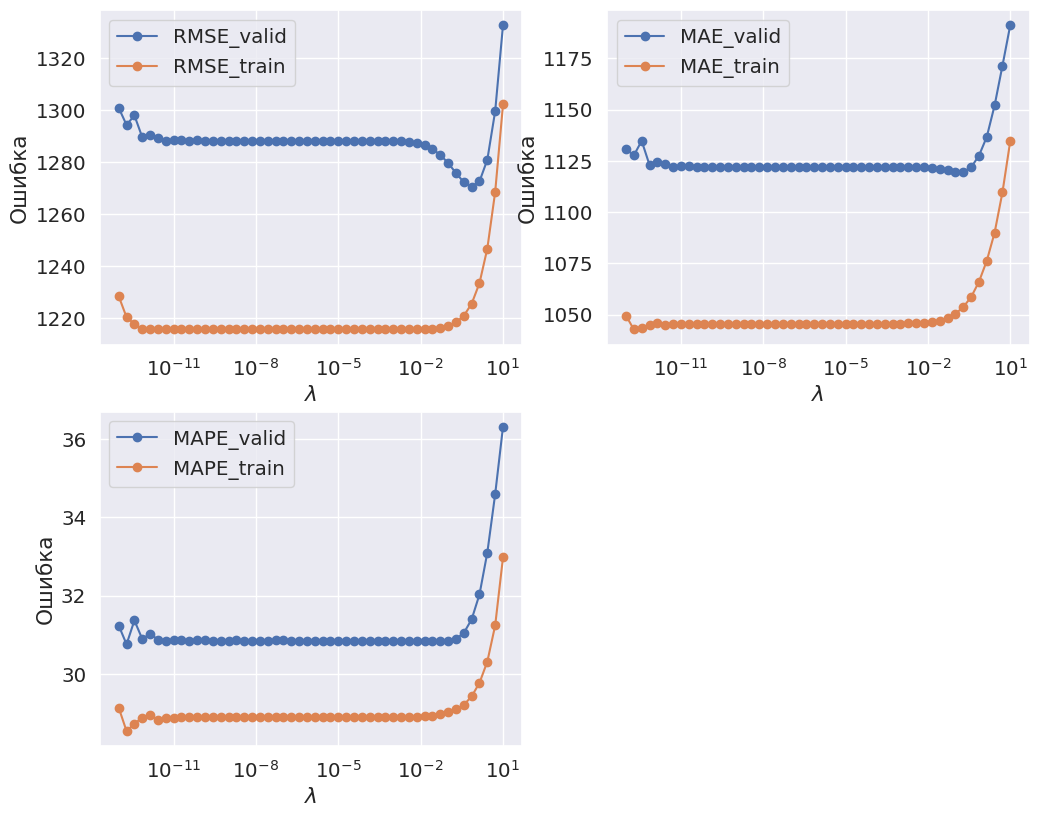

In [30]:
models = []
rmse_mae_mape = []

lambda_values = np.logspace(-13, 1)

for i, lambda_ in enumerate(lambda_values):
    models.append(RidgeRegression(lambd = lambda_, fit_intercept=True)) 
    models[i].fit(X_train, train[target_feature])
    rmse_mae_mape.append(list(RMSE_MAE_MAPE(valid['cnt'], models[i].predict(X_valid))))

rmse_mae_mape = np.array(rmse_mae_mape)

with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 20))
    grades = ['RMSE', 'MAE', 'MAPE']

    for i, grade in enumerate(grades):
        plt.subplot(4, 2, 1 + i)
        plt.xscale('log')
        plt.plot(lambda_values, rmse_mae_mape[:, i], label=grade + '_valid', marker='o')
        plt.plot(lambda_values, [model.grade[i] for model in models], label=grade + '_train', marker='o')
        plt.xlabel(r'$\lambda$')
        plt.ylabel(r'Ошибка')
        plt.legend()
        plt.grid(True)

Откуда видно, что по RMSE и MAE на тренировочной выборке оценка лучше, а на MAPE - хуже. Это можно попробовать объяснить переобучением. При слишком малых значениях или слишком больших, например, еще может сказаться плохая точность вычислений.

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

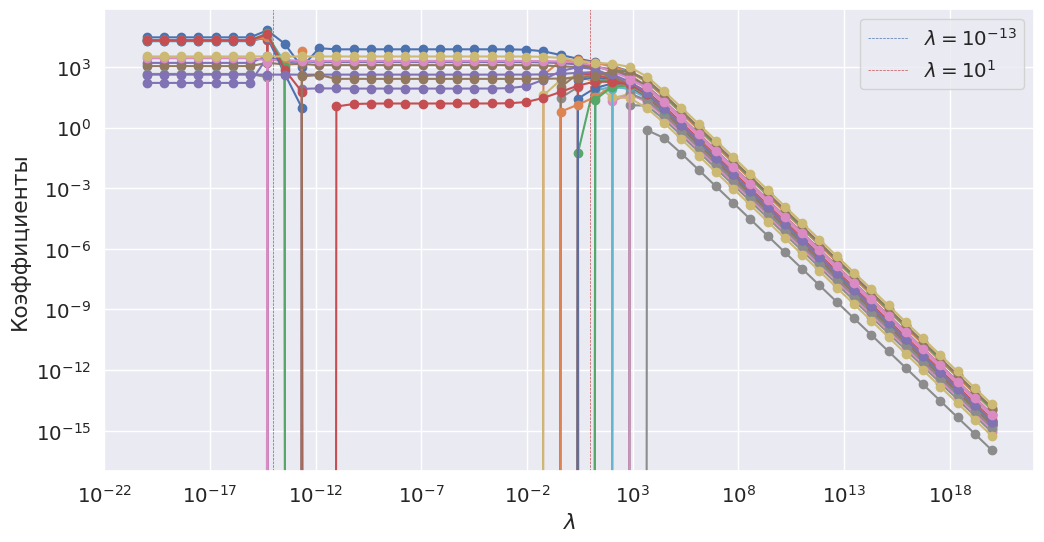

In [31]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    
    for i in range(models[0].coeff.size):
        plt.plot(lambda_big_values, [model.coeff[i] for model in models_big], marker='o')

    plt.axvline(x=10**(-14), color='b', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{-13}$')
    plt.axvline(x=10**1, color='r', linestyle='--', linewidth=0.5, label=r'$\lambda = 10^{1}$')
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'Коэффициенты')
    plt.legend()

Как мы можем увидеть, чем больше $\lambda$, тем большее число коэффициентов принимают ненулевые значения. По сути, мы начинаем не игнорировать их, и "включать" в игру. Далее, при слишком больших $\lambda$, минимизация функционала, возможно, связана с минимизацией слагаемого $\lambda ||\theta||_2$, а не МНК-слагаемого, поэтому значения коэффициентов начинают убывать в логарифмических координатах линейно. При этом найденные значение $\lambda = 10^{-13}, 10^{1}$ с резким изменением метрик соответствуют тому, что в "игру" вступили некоторые дополнительные признаки.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Возьмем $\lambda = 10^{-5}$ посередине линейной части

In [32]:
final_model = RidgeRegression(lambd = 10 ** -5, fit_intercept=True)
final_model.fit(X_train, train[target_feature])

RMSE_MAE_MAPE(test['cnt'], final_model.predict(X_test))

(1289.304342564632, 1075.4009857487647, 33.35018740805882)

Сделайте выводы.

Итого мы получаем оценки в среднем лучше, чем в первой части с удалением зависимых между собой признаков и сравнимо-чуть лучше с библиотечной LinearRegression ~~(1300, 1100, 35)

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

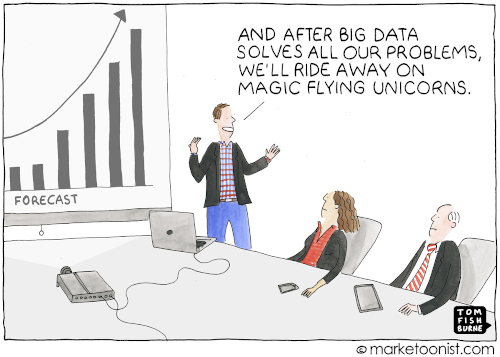

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [33]:
shape = X_train.shape[1]
coeff = np.zeros(shape + 1)
coeff

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Шаг имеет вид:
$$\theta_{new} = \theta_{old} - \eta \cdot \frac{1}{k} (- X_J^T Y_J + X_J^T X_J) \theta_{old}) - \frac{\eta}{n} \lambda \theta_{old}$$

In [34]:
def step(coeff, X, Y, lambd, batch_size=256, rate=0.1):
    '''
        Вычисление шага градиентного спуска.
        
        Аргументы:
        coeff -- коэффициенты в виде numpy-вектора размера (d,).
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-матрица объект-таргет размера (n, d);
        lambda -- гиперпараметр в модели Ridge-регрессии
        batch_size -- размер батча
        rate -- шаг градиентного спуска
        
        Возвращает:
        coeff_new -- новые значения коэффициента в виде numpy-вектора размера (n,).
    '''
        
    n, d = X.shape
    indicies = np.random.choice(n, size=batch_size, replace=False)
    X_new =  np.hstack((X[indicies], np.ones((batch_size, 1))))
    Y_new = Y.iloc[indicies]
    coeff_new = coeff - rate / batch_size * ( - X_new.T @ Y_new + X_new.T @ X_new @ coeff) - rate * lambd * coeff / n
    return coeff_new

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [35]:
coeff = np.zeros(shape + 1)

n, d = X_train.shape
rmse_mae_mape_train = []
rmse_mae_mape_validate = []

for i in range(1500):
    coeff = step(coeff, X_train, train['cnt'], 10 ** 0.7, 256, 0.1)
    rmse_mae_mape_train.append(RMSE_MAE_MAPE(train['cnt'], np.hstack((X_train, np.ones((n, 1)))) @ coeff))
    rmse_mae_mape_validate.append(RMSE_MAE_MAPE(valid['cnt'],
                                                np.hstack((X_valid, np.ones((X_valid.shape[0], 1)))) @ coeff))

rmse_mae_mape_train = np.array(rmse_mae_mape_train)
rmse_mae_mape_validate = np.array(rmse_mae_mape_validate)

Осталось построить графики:

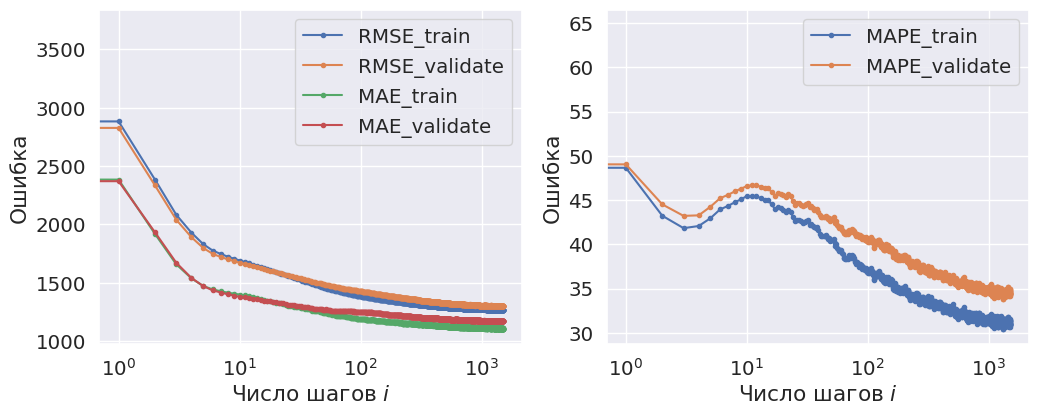

In [36]:
with sns.plotting_context(font_scale=0.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(12, 20))
    grades = ['RMSE', 'MAE', 'MAPE']

    for i, grade in enumerate(grades):
        plt.subplot(4, 2, 1 + i - (i == 1) - (i == 2))
        plt.xscale('log')
        plt.plot(range(rmse_mae_mape_train.shape[0]), rmse_mae_mape_train[:, i], 
                 label=grade + '_train', marker='o', markersize=3)
        plt.plot(range(rmse_mae_mape_validate.shape[0]), rmse_mae_mape_validate[:, i], 
                 label=grade + '_validate', marker='o', markersize=3)
        plt.xlabel(r'Число шагов $i$')
        plt.ylabel(r'Ошибка')
        plt.legend()
        plt.grid(True)

В логарифмическом масштабе ошибка убывает линейно, а значит нам нужно экспоненциально много шагов для того, чтобы уменьшить ошибку. 

Посчитайте ошибку на тестовой выборке.

In [37]:
RMSE_MAE_MAPE(test['cnt'], np.hstack((X_test, np.ones((X_test.shape[0], 1)))) @ coeff)

(1338.0102758739772, 1135.0563201856507, 37.53881573036833)

In [38]:
coeff

array([ 2208.763,  1968.675,  -768.051,  -411.319,  1279.324,   999.848,
        1560.519,    64.267,   354.342,    28.105,   302.471,   434.563,
         150.803,   527.213,   981.907,   550.558,  -358.425,  -132.451,
        -225.828,  -136.178,    41.072,    11.949,    -3.771,   160.739,
         538.557,   299.639,  -364.383, -1612.212,  1730.313])

Сделайте выводы.

Мы получили точность сравнимую с точным вычислением в предыдущем пункте, а стохастический градиентный спуск сошелся. Похоже, что существенно лучшую точность не получится получить, это ограничение линейного приближения как такового.